The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

* Variable (Abbr.) Unit Min Max Mean
* Ambient temperature (AT) C â€“6.23 37.10 17.71
* Ambient pressure (AP) mbar 985.85 1036.56 1013.07
* Ambient humidity (AH) (%) 24.08 100.20 77.87
* Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
* Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
* Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
* Turbine after temperature (TAT) C 511.04 550.61 546.16
* Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
* Turbine energy yield (TEY) MWH 100.02 179.50 133.51
* Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
* Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense, Activation, Lambda, Layer
from sklearn.preprocessing import StandardScaler

In [37]:
gas = pd.read_csv('gas_turbines.csv')
gas

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

In [38]:
gas.shape

(15039, 11)

In [39]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [40]:
gas.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [41]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


# Visualizations

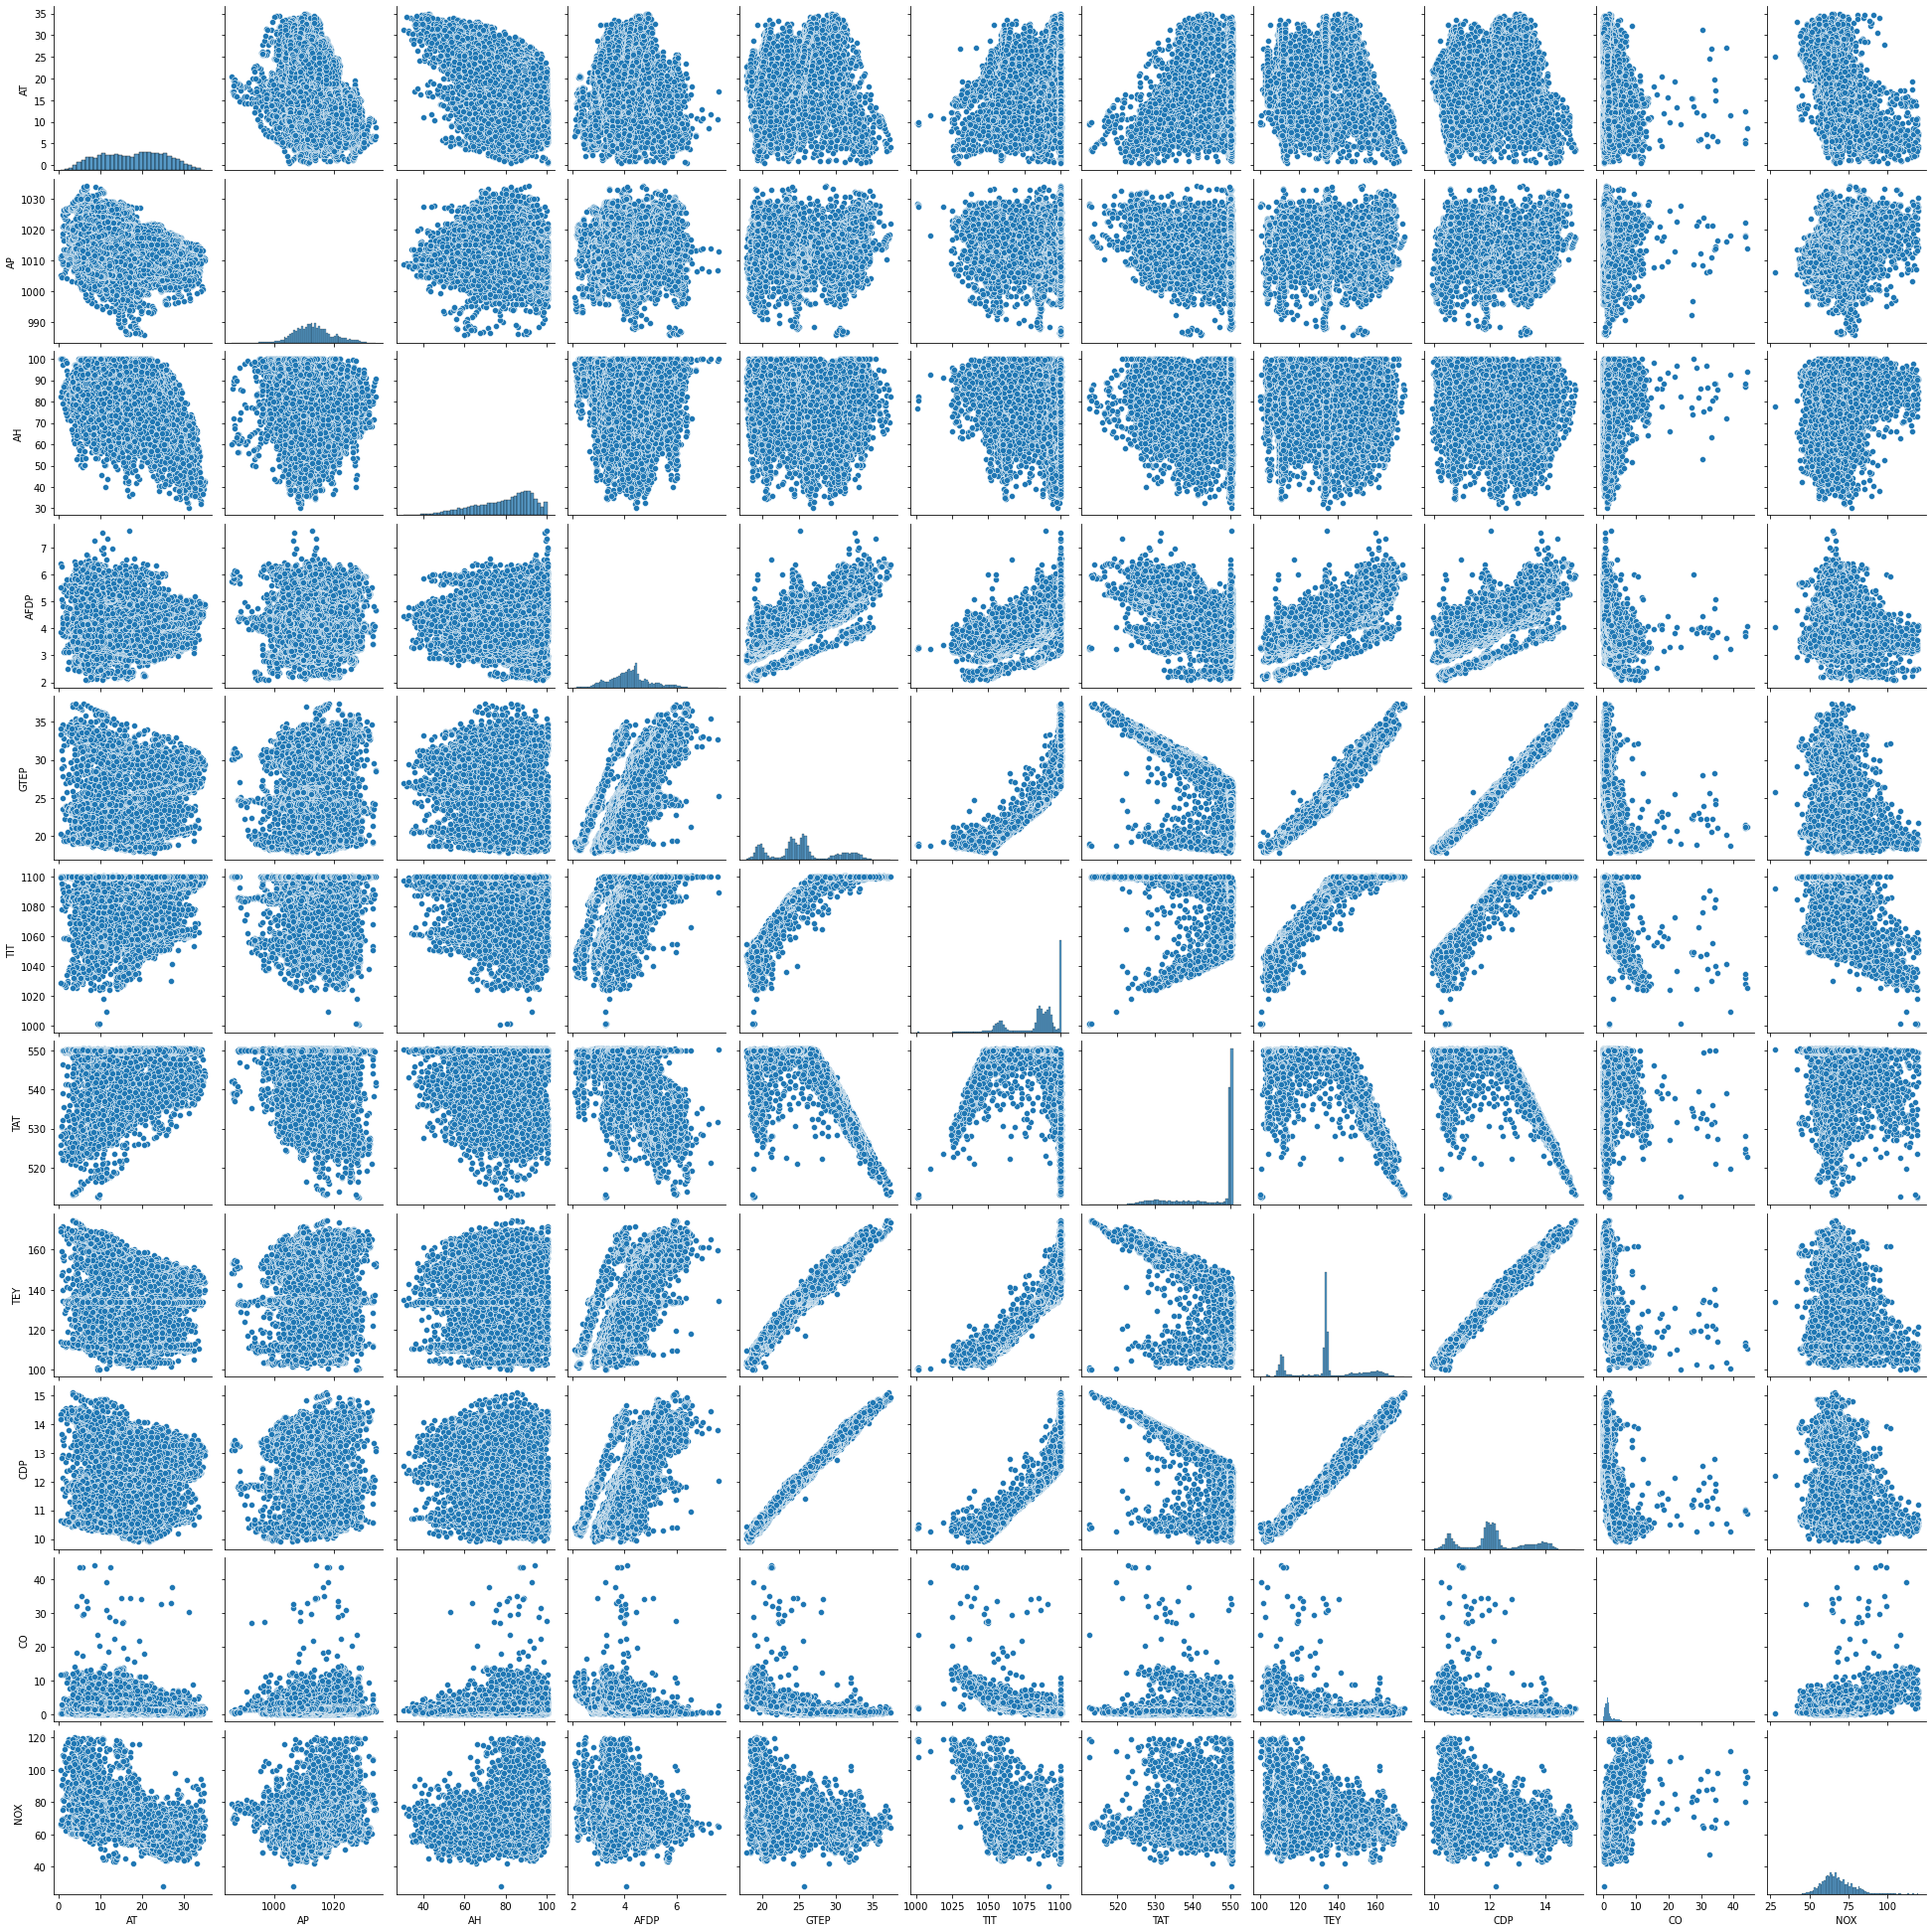

In [42]:
sns.pairplot(gas)

In [43]:
gas_corr = gas.corr()
gas_corr

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

<AxesSubplot:>

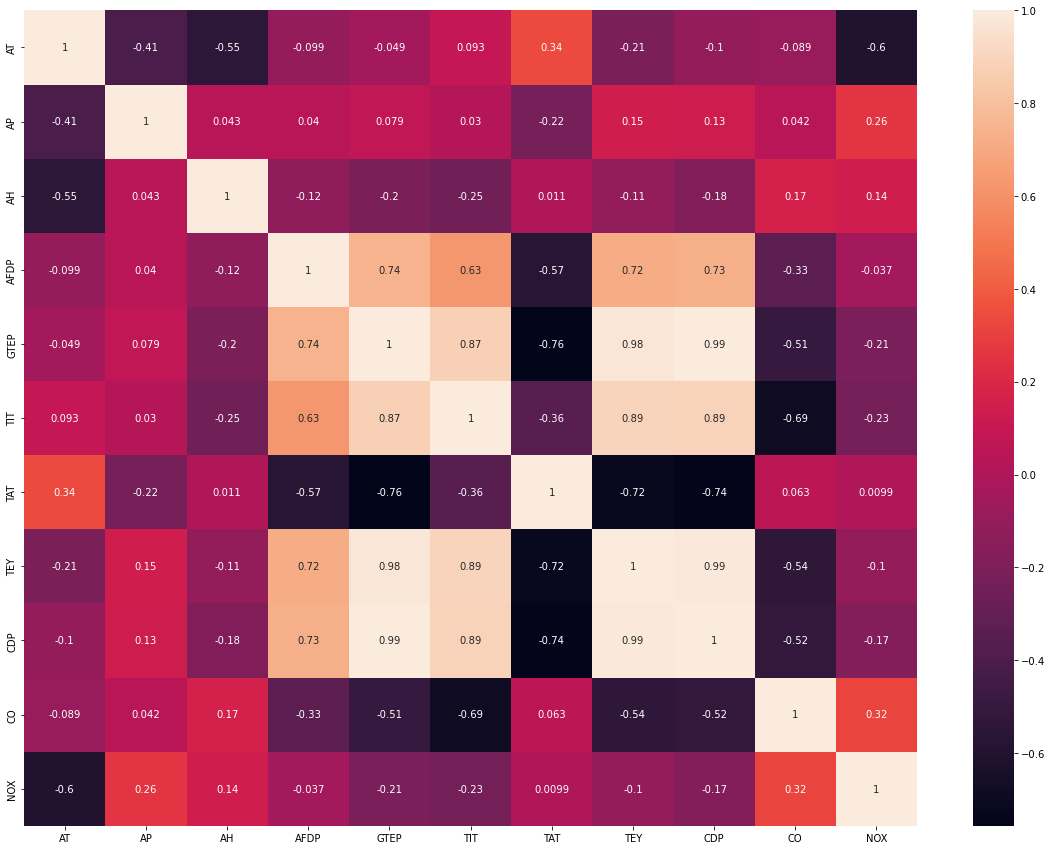

In [44]:
plt.figure(figsize=(20,15))
sns.heatmap(gas.corr(), annot=True)

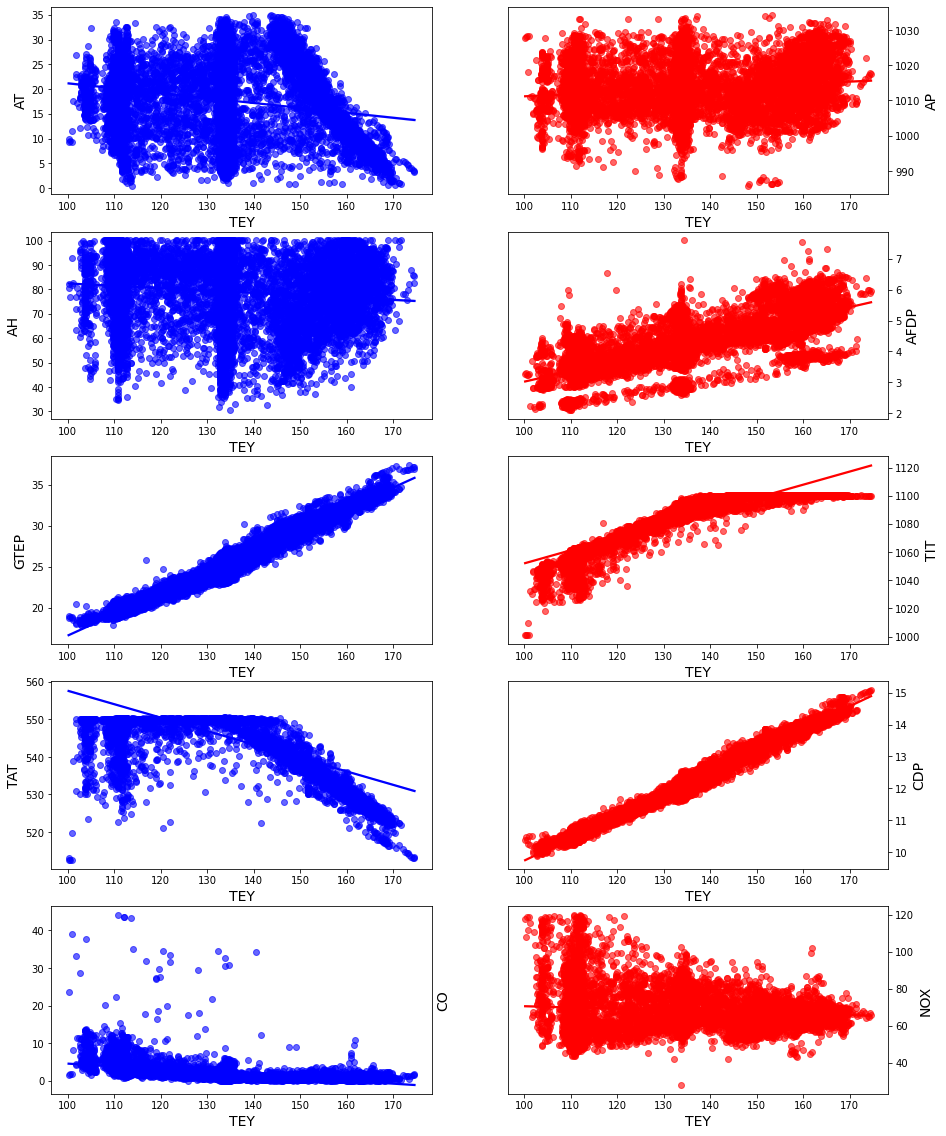

In [45]:
# plot regplots  for Age, KM, HP, CC, Doors, Gears, Quarterly_Tax and Weight against TEY 
f, axes = plt.subplots(5,2, figsize=(15,20))

sns.regplot(x = 'TEY', y = 'AT', data = gas, ax = axes[0,0], color = 'b', scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('TEY', fontsize = 14)
axes[0,0].set_ylabel('AT', fontsize=14)
axes[0,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AP', data = gas, ax = axes[0,1], color = 'r',scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('TEY', fontsize = 14)
axes[0,1].set_ylabel('AP', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'AH', data = gas, ax = axes[1,0], color = 'b',scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('TEY', fontsize = 14)
axes[1,0].set_ylabel('AH', fontsize=14)
axes[1,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AFDP', data = gas, ax = axes[1,1], color = 'r',scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('TEY', fontsize = 14)
axes[1,1].set_ylabel('AFDP', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'GTEP', data = gas, ax = axes[2,0], color = 'b',scatter_kws={'alpha':0.6})
axes[2,0].set_xlabel('TEY', fontsize = 14)
axes[2,0].set_ylabel('GTEP', fontsize=14)
axes[2,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'TIT', data = gas, ax = axes[2,1], color = 'r',scatter_kws={'alpha':0.6})
axes[2,1].set_xlabel('TEY', fontsize = 14)
axes[2,1].set_ylabel('TIT', fontsize=14)
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()

sns.regplot(x = 'TEY', y = 'TAT', data = gas, ax = axes[3,0], color = 'b',scatter_kws={'alpha':0.6})
axes[3,0].set_xlabel('TEY', fontsize = 14)
axes[3,0].set_ylabel('TAT', fontsize=14)
axes[3,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'CDP', data = gas, ax = axes[3,1], color = 'r',scatter_kws={'alpha':0.6})
axes[3,1].set_xlabel('TEY', fontsize = 14)
axes[3,1].set_ylabel('CDP', fontsize=14)
axes[3,1].yaxis.set_label_position("right")
axes[3,1].yaxis.tick_right()

sns.regplot(x = 'TEY', y = 'CO', data = gas, ax = axes[4,0], color = 'b',scatter_kws={'alpha':0.6})
axes[4,0].set_xlabel('TEY', fontsize = 14)
axes[4,0].set_ylabel('CO', fontsize=14)
axes[4,0].yaxis.set_label_position("right")
axes[4,0].yaxis.tick_left()

sns.regplot(x = 'TEY', y = 'NOX', data = gas, ax = axes[4,1], color = 'r',scatter_kws={'alpha':0.6})
axes[4,1].set_xlabel('TEY', fontsize = 14)
axes[4,1].set_ylabel('NOX', fontsize=14)
axes[4,1].yaxis.set_label_position("right")
axes[4,1].yaxis.tick_right()

plt.show()

In [46]:
# lets check the features of the dataset
feat = gas.columns
print(feat)

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')


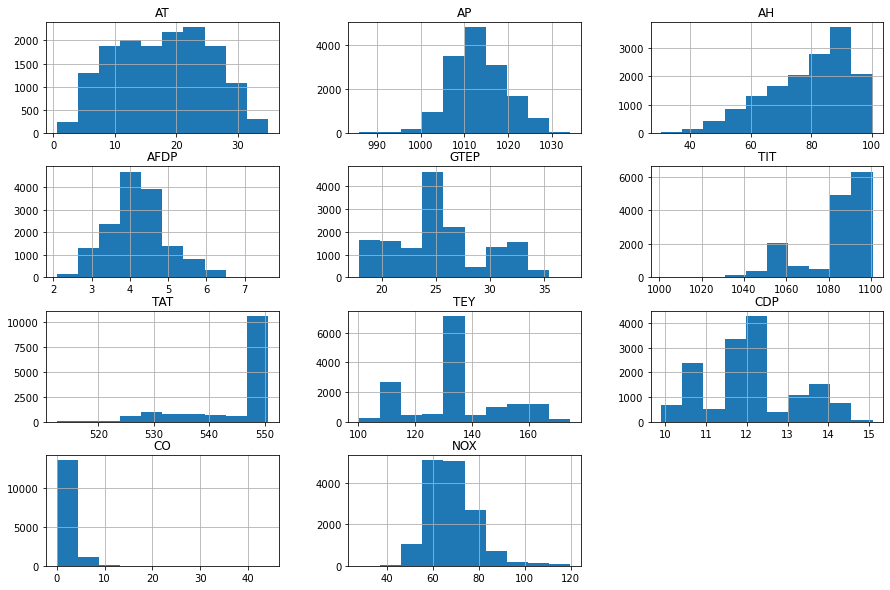

In [47]:
# lets plot the indiuval plot the features
gas[feat].hist(figsize=(15,10))
plt.show()

In [48]:
scaled = StandardScaler()
gasnorm = pd.DataFrame(scaled.fit_transform(gas))

In [49]:
gasnorm

0         1         2         3         4         5         6   \
0     -1.439778 -0.826644  1.281436 -0.921232 -1.379101 -1.488376  0.585240   
1     -1.449601 -0.748647  1.304564 -0.921495 -1.363528 -1.482325  0.585240   
2     -1.434721 -0.686250  1.219086 -0.944385 -1.351309 -1.476275  0.568715   
3     -1.413702 -0.623853  1.169060 -0.946884 -1.348194 -1.464173  0.583969   
4     -1.368693 -0.545857  1.161883 -0.924389 -1.354663 -1.458123  0.582698   
...         ...       ...       ...       ...       ...       ...       ...   
15034 -1.153182 -1.185428  1.401860 -0.865850 -1.498657 -2.063184  0.103453   
15035 -1.303986 -1.138630  1.447753 -0.913470 -1.438759 -2.268905 -0.276638   
15036 -1.386267 -1.076233  1.476971 -0.951488 -1.410967 -2.789257 -1.026650   
15037 -1.420423 -0.998236  1.441590 -0.988848 -1.447624 -2.456474 -0.528337   
15038 -1.430734 -0.935839  1.334652 -1.016605 -1.464635 -2.051083  0.057689   

             7         8         9         10  
0     -1.231172 -1.357331  0.532012  1.387845  
1     -1.229909 -1.363676  0.568733  1.393002  
2     -1.230541 -1.360957  0.552938  1.363586  
3     -1.229909 -1.356424  0.548933  1.382878  
4     -1.229909 -1.350985  0.574179  1.348591  
...         ...       ...       ...       ...  
15034 -1.426381 -1.543161  1.145792  1.085751  
15035 -1.415642 -1.513247  1.293578  1.119943  
15036 -1.516089 -1.467922  2.695925  2.170062  
15037 -1.481343 -1.422598  1.924683  2.391165  
15038 -1.428277 -1.377273  1.354150  2.321539  

[15039 rows x 11 columns]

In [50]:
x = gas.drop('TEY', axis=1)
y = gas.iloc[:, [7]]
x = scaled.fit_transform(x)
y = scaled.fit_transform(y)
print(x)
y

[[-1.4397781  -0.82664395  1.28143632 ... -1.35733078  0.53201195
   1.3878449 ]
 [-1.44960109 -0.74864748  1.30456402 ... -1.36367619  0.56873344
   1.39300237]
 [-1.43472138 -0.68625031  1.21908576 ... -1.36095673  0.5529378
   1.36358566]
 ...
 [-1.38626659 -1.07623263  1.47697056 ... -1.46792219  2.69592467
   2.17006209]
 [-1.42042259 -0.99823616  1.44159024 ... -1.42259784  1.9246834
   2.391165  ]
 [-1.43073409 -0.93583899  1.33465179 ... -1.37727349  1.35415028
   2.32153907]]


array([[-1.23117246],
       [-1.22990897],
       [-1.23054071],
       ...,
       [-1.5160891 ],
       [-1.48134317],
       [-1.42827666]])

In [51]:
model = Sequential()
model.add(Dense(10, input_dim = 10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 4)                 44        
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 179
Trainable params: 179
Non-trainable params: 0
_________________________________________________________________


#### Lets compile the model

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Fitting the model

In [54]:
history = model.fit(x, y, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
1204/1204 [==============================] - 4s 3ms/step - loss: -312.0228 - accuracy: 0.0000e+00 - val_loss: -2255.5847 - val_accuracy: 0.0000e+00
Epoch 2/100
1204/1204 [==============================] - 3s 3ms/step - loss: -8445.3896 - accuracy: 0.0000e+00 - val_loss: -28329.1992 - val_accuracy: 0.0000e+00
Epoch 3/100
1204/1204 [==============================] - 4s 3ms/step - loss: -44316.6680 - accuracy: 0.0000e+00 - val_loss: -108031.6406 - val_accuracy: 0.0000e+00
Epoch 4/100
1204/1204 [==============================] - 4s 3ms/step - loss: -129037.5625 - accuracy: 0.0000e+00 - val_loss: -273150.6562 - val_accuracy: 0.0000e+00
Epoch 5/100
1204/1204 [==============================] - 4s 4ms/step - loss: -284805.1250 - accuracy: 0.0000e+00 - val_loss: -552417.5000 - val_accuracy: 0.0000e+00
Epoch 6/100
1204/1204 [==============================] - 4s 4ms/step - loss: -532787.8125 - accuracy: 0.0000e+00 - val_loss: -976403.8125 - val_accuracy: 0.0000e+00
Epoch 7/100
1204/12

1204/1204 [==============================] - 4s 4ms/step - loss: -8556163072.0000 - accuracy: 0.0000e+00 - val_loss: -12287414272.0000 - val_accuracy: 0.0000e+00
Epoch 97/100
1204/1204 [==============================] - 4s 3ms/step - loss: -8892281856.0000 - accuracy: 0.0000e+00 - val_loss: -12770467840.0000 - val_accuracy: 0.0000e+00
Epoch 98/100
1204/1204 [==============================] - 4s 4ms/step - loss: -9240379392.0000 - accuracy: 0.0000e+00 - val_loss: -13267801088.0000 - val_accuracy: 0.0000e+00
Epoch 99/100
1204/1204 [==============================] - 5s 4ms/step - loss: -9597201408.0000 - accuracy: 0.0000e+00 - val_loss: -13776260096.0000 - val_accuracy: 0.0000e+00
Epoch 100/100
1204/1204 [==============================] - 5s 4ms/step - loss: -9963745280.0000 - accuracy: 0.0000e+00 - val_loss: -14301812736.0000 - val_accuracy: 0.0000e+00


#### Evaluating the model

In [55]:
_, score = model.evaluate(x, y)
print('Accuracy : ', (score*100))

470/470 [==============================] - 1s 3ms/step - loss: -10982055936.0000 - accuracy: 0.0000e+00
Accuracy :  0.0


PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS (Fireforests)

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [57]:
fire = pd.read_csv('forestfires.csv')
fire

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [58]:
fire.drop(['month', 'day'], axis=1, inplace=True)

In [59]:
fire['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [60]:
fire.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [61]:
fire.describe().T

count        mean         std   min    25%     50%     75%      max
FFMC      517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC       517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC        517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI       517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp      517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH        517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind      517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain      517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area      517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84
dayfri    517.0    0.164410    0.371006   0.0    0.0    0.00    0.00     1.00
daymon    517.0    0.143133    0.350548   0.0    0.0    0.00    0.00     1.00
daysat    517.0    0.162476    0.369244   0.0    0.0    0.00    0.00     1.00
daysun    517.0    0.183752    0.387657   0.0    0.0    0.00    0.00     1.00
daythu    517.0    0.117988    0.322907   0.0    0.0    0.00    0.00     1.00
daytue    517.0    0.123791    0.329662   0.0    0.0    0.00    0.00     1.00
daywed    517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthapr  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthaug  517.0    0.355899    0.479249   0.0    0.0    0.00    1.00     1.00
monthdec  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthfeb  517.0    0.038685    0.193029   0.0    0.0    0.00    0.00     1.00
monthjan  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthjul  517.0    0.061896    0.241199   0.0    0.0    0.00    0.00     1.00
monthjun  517.0    0.032882    0.178500   0.0    0.0    0.00    0.00     1.00
monthmar  517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthmay  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthnov  517.0    0.001934    0.043980   0.0    0.0    0.00    0.00     1.00
monthoct  517.0    0.029014    0.168007   0.0    0.0    0.00    0.00     1.00
monthsep  517.0    0.332689    0.471632   0.0    0.0    0.00    1.00     1.00

<AxesSubplot:xlabel='area'>

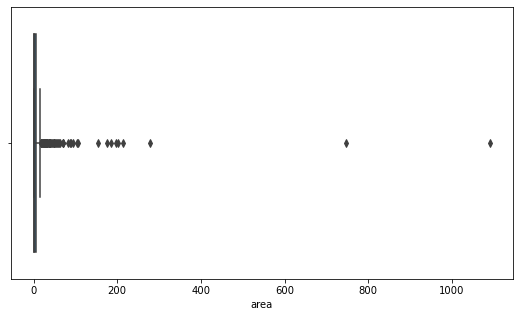

In [62]:
sns.boxplot(fire['area'])

In [63]:
plt.rcParams['figure.figsize'] = 9,5

Skew :  12.846933533934868
Kurtosis :  194.1407210942299


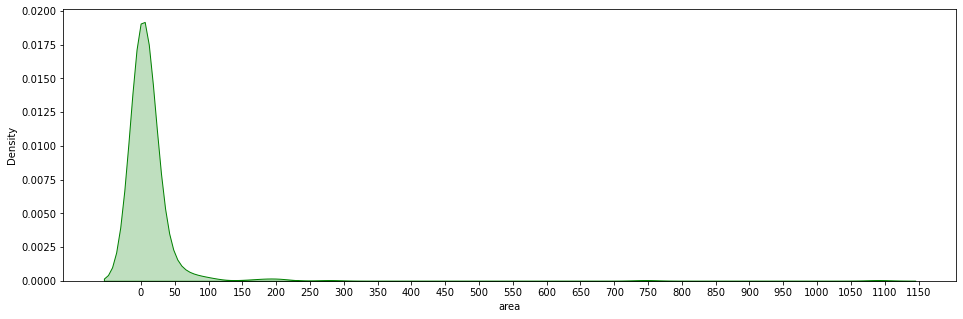

In [64]:
plt.figure(figsize=(16, 5))
print('Skew : ', fire['area'].skew())
print('Kurtosis : ', fire['area'].kurtosis())
sns.kdeplot(fire['area'], shade=True, color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

<AxesSubplot:xlabel='area', ylabel='Density'>

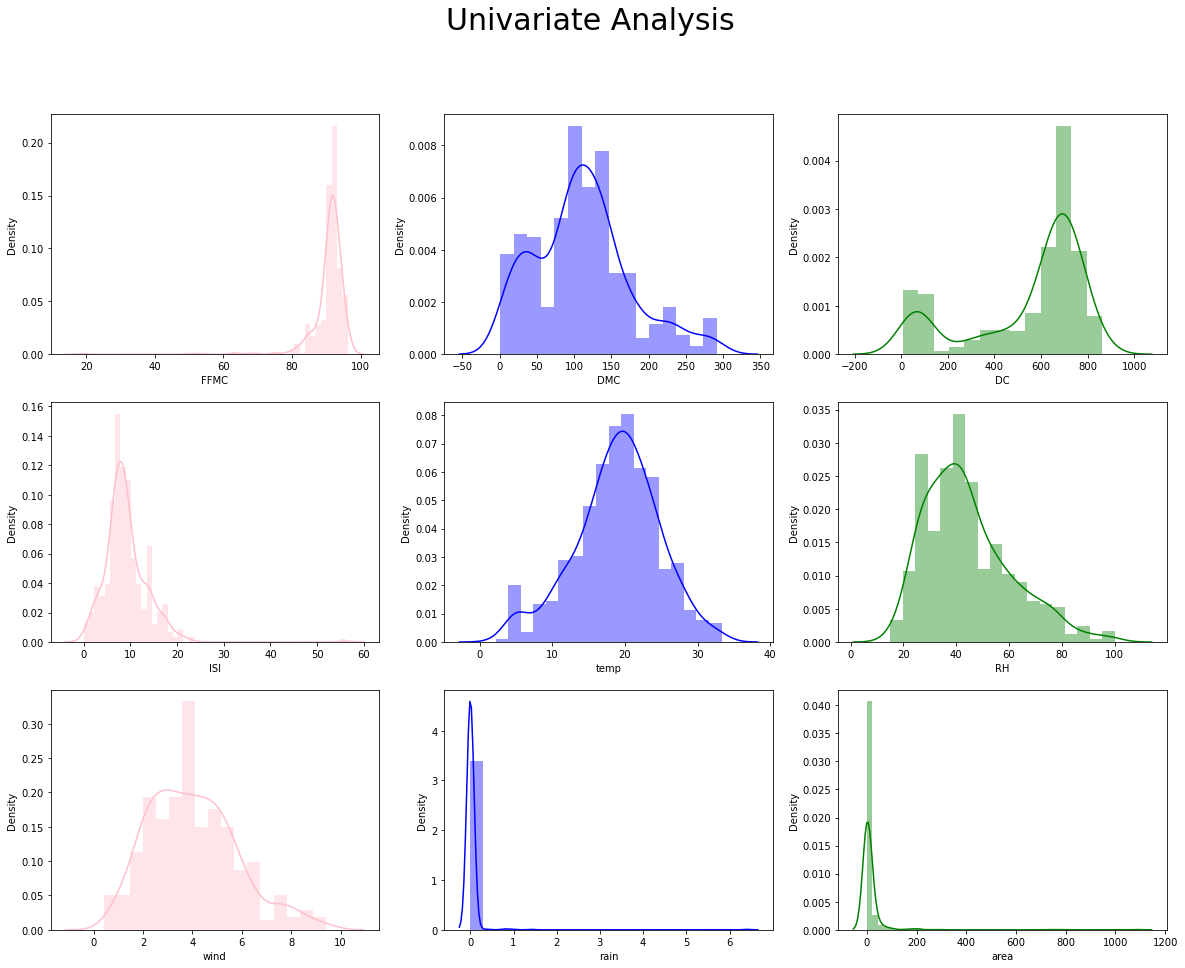

In [65]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Univariate Analysis', fontsize=30)
sns.distplot(fire['FFMC'], ax = axes[0, 0], color = 'pink')
sns.distplot(fire['DMC'], ax = axes[0, 1], color = 'blue')
sns.distplot(fire['DC'], ax = axes[0, 2], color = 'green')
sns.distplot(fire['ISI'], ax = axes[1, 0], color = 'pink')
sns.distplot(fire['temp'], ax = axes[1, 1], color = 'blue')
sns.distplot(fire['RH'], ax = axes[1, 2], color = 'green')
sns.distplot(fire['wind'], ax = axes[2, 0], color = 'pink')
sns.distplot(fire['rain'], ax = axes[2, 1], color = 'blue')
sns.distplot(fire['area'], ax = axes[2, 2], color = 'green')

In [66]:
corr = fire.corr()

In [67]:
corr

FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995   
DMC       0.382619  1.000000  0.682192  0.305128  0.469594  0.073795   
DC        0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192   
ISI       0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517   
temp      0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390   
RH       -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000   
wind     -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410   
rain      0.056702  0.074790  0.035861  0.067668  0.069491  0.099751   
area      0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519   
dayfri    0.019306 -0.012010 -0.004220  0.046695 -0.071949  0.064506   
daymon   -0.059396 -0.107921 -0.052993 -0.158601 -0.136529  0.009376   
daysat   -0.019637 -0.003653 -0.035189 -0.038585  0.034899 -0.023869   
daysun   -0.089517  0.025355 -0.001431 -0.003243  0.014403  0.136220   
daythu    0.071730  0.087672  0.051859 -0.022406  0.051432 -0.123061   
daytue    0.011225  0.000016  0.028368  0.068610  0.035630 -0.014211   
daywed    0.093908  0.017939  0.024803  0.125415  0.090580 -0.087508   
monthapr -0.117199 -0.197543 -0.268211 -0.106478 -0.157051  0.021235   
monthaug  0.228103  0.497928  0.279361  0.334639  0.351404  0.054761   
monthdec -0.137044 -0.176301 -0.105642 -0.162322 -0.329648 -0.047714   
monthfeb -0.281535 -0.317899 -0.399277 -0.249777 -0.320015  0.140430   
monthjan -0.454771 -0.105647 -0.115064 -0.103588 -0.146520  0.170923   
monthjul  0.031833 -0.001946 -0.100887  0.020982  0.142588  0.013185   
monthjun -0.040634 -0.050403 -0.186183  0.111516  0.051015  0.009382   
monthmar -0.074327 -0.407404 -0.650427 -0.143520 -0.341797 -0.089836   
monthmay -0.037230 -0.081980 -0.114209 -0.060493 -0.045540  0.086822   
monthnov -0.088964 -0.074218 -0.078380 -0.076559 -0.053798 -0.035885   
monthoct -0.005998 -0.187632  0.093279 -0.071154 -0.053513 -0.072334   
monthsep  0.076609  0.110907  0.531857 -0.068877  0.088006 -0.062596   

              wind      rain      area    dayfri  ...  monthdec  monthfeb  \
FFMC     -0.028485  0.056702  0.040122  0.019306  ... -0.137044 -0.281535   
DMC      -0.105342  0.074790  0.072994 -0.012010  ... -0.176301 -0.317899   
DC       -0.203466  0.035861  0.049383 -0.004220  ... -0.105642 -0.399277   
ISI       0.106826  0.067668  0.008258  0.046695  ... -0.162322 -0.249777   
temp     -0.227116  0.069491  0.097844 -0.071949  ... -0.329648 -0.320015   
RH        0.069410  0.099751 -0.075519  0.064506  ... -0.047714  0.140430   
wind      1.000000  0.061119  0.012317  0.118090  ...  0.269702 -0.029431   
rain      0.061119  1.000000 -0.007366 -0.004261  ... -0.009752 -0.014698   
area      0.012317 -0.007366  1.000000 -0.052911  ...  0.001010 -0.020732   
dayfri    0.118090 -0.004261 -0.052911  1.000000  ... -0.019140  0.046323   
daymon   -0.063881 -0.029945 -0.021206 -0.181293  ...  0.114519  0.003933   
daysat   -0.063799 -0.032271  0.087868 -0.195372  ... -0.058625  0.020406   
daysun    0.027981 -0.017872 -0.020463 -0.210462  ... -0.024966  0.008416   
daythu   -0.062553 -0.026798  0.020121 -0.162237  ... -0.002838 -0.042278   
daytue    0.053396  0.139311 -0.001333 -0.166728  ... -0.005125 -0.014491   
daywed   -0.019965 -0.020744 -0.011452 -0.151487  ...  0.002899 -0.035713   
monthapr  0.048266 -0.009752 -0.008280 -0.019140  ... -0.017717 -0.026701   
monthaug  0.028577  0.093101 -0.004187 -0.100837  ... -0.098941 -0.149116   
monthdec  0.269702 -0.009752  0.001010 -0.019140  ...  1.000000 -0.026701   
monthfeb -0.029431 -0.014698 -0.020732  0.046323  ... -0.026701  1.000000   
monthjan -0.070245 -0.004566 -0.012589 -0.027643  ... -0.008295 -0.012501   
monthjul -0.040645 -0.013390  0.006149 -0.048969  ... -0.034190 -0.051528   
monthjun  0.012124 -0.013510 -0.020314  0.006000  ... -0.024543 -0.036989   
monthmar  0.181433 -0.020744 -0.045596  0.036205  ... -0.045456 -0.068508   


<AxesSubplot:>

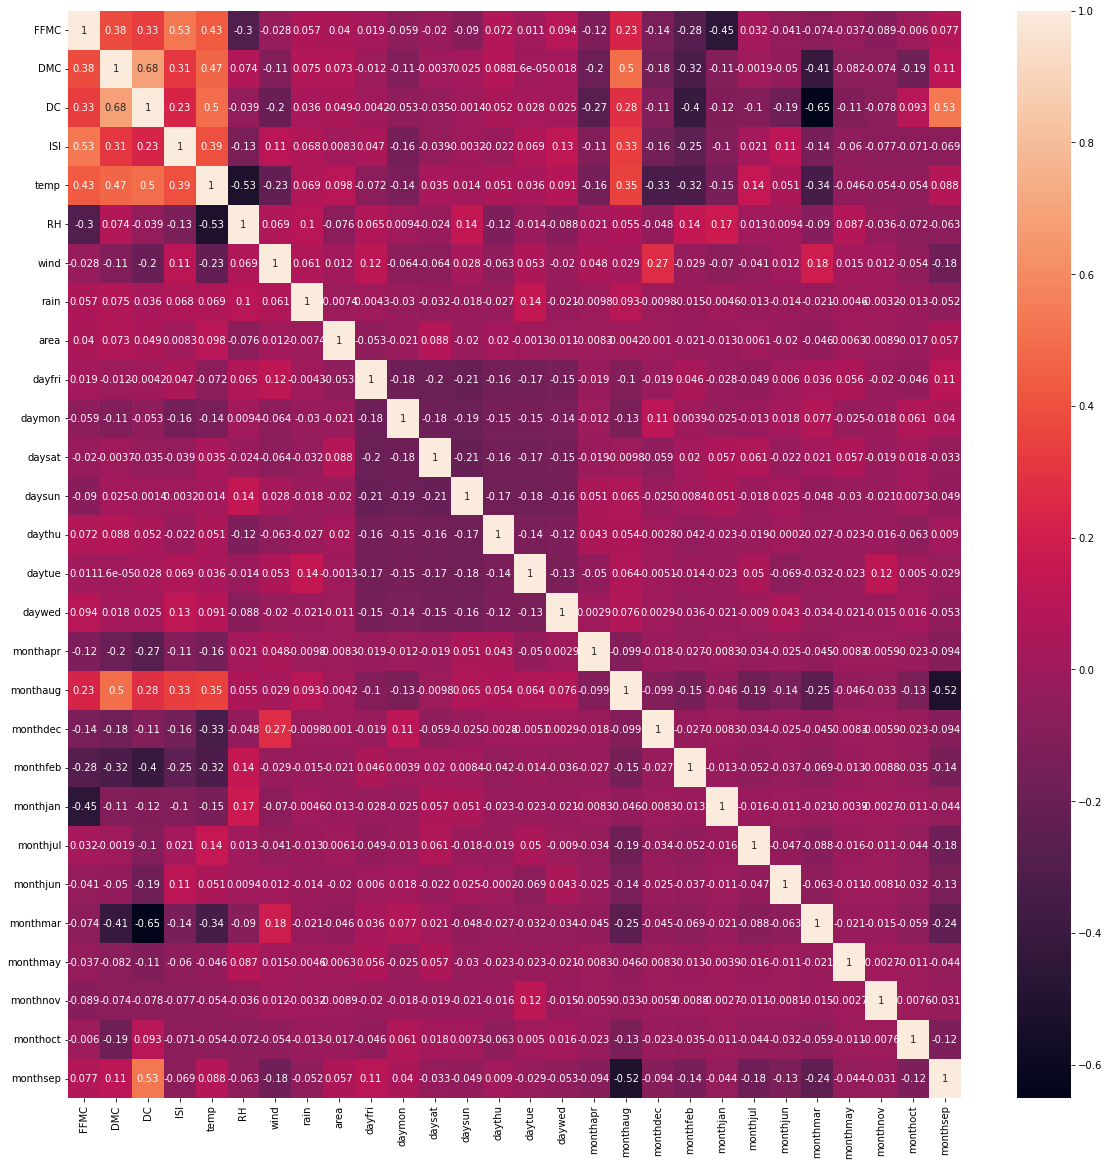

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [70]:
categ = {'small':1, 'large':2}
fire = fire.replace(categ)

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(fire)
firenorm = sc.transform(fire)
firenorm

array([[-0.80595947, -1.32332557, -1.83047676, ..., -0.17285971,
        -0.70608125, -0.60640322],
       [-0.00810203, -1.17954077,  0.48889092, ...,  5.78503817,
        -0.70608125, -0.60640322],
       [-0.00810203, -1.04982188,  0.56071545, ...,  5.78503817,
        -0.70608125, -0.60640322],
       ...,
       [-1.64008316, -0.84664771,  0.47476811, ..., -0.17285971,
        -0.70608125,  1.64906775],
       [ 0.68095666,  0.54900254,  0.26938221, ..., -0.17285971,
        -0.70608125, -0.60640322],
       [-2.02087875, -1.68591332, -1.78044169, ..., -0.17285971,
        -0.70608125, -0.60640322]])

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=28)
pcaval = pca.fit_transform(firenorm)
pcaval

array([[ 3.77221515e+00, -1.34378896e+00, -8.09151560e-01, ...,
        -2.35677022e-01, -6.50612548e-02,  8.05689053e-15],
       [ 3.95929632e-01,  8.01089845e-01, -1.00335179e+00, ...,
         1.09748520e-01,  3.47690043e-02,  8.76357440e-15],
       [ 6.95451497e-01,  1.14726326e+00, -1.10826949e+00, ...,
        -3.73870919e-01,  2.67497349e-02,  1.35444460e-15],
       ...,
       [ 9.08135308e-01, -2.03681120e-01,  2.54049965e+00, ...,
         4.43911159e-01, -2.99354702e-01, -6.02765373e-17],
       [-1.61519161e+00, -1.01558495e+00,  3.66651668e-01, ...,
         4.23063377e-01,  3.96312961e-02,  2.54604586e-18],
       [ 4.08227879e+00, -4.09702220e-01, -1.86992584e-01, ...,
         1.34765436e-01, -2.50472500e-02,  3.36582194e-17]])

In [73]:
var = pca.explained_variance_ratio_
var

array([1.30856143e-01, 6.62889860e-02, 6.03404975e-02, 5.21400470e-02,
       4.98240912e-02, 4.55588145e-02, 4.46382192e-02, 4.19353288e-02,
       4.09338586e-02, 3.89678447e-02, 3.79421361e-02, 3.74596718e-02,
       3.60397219e-02, 3.50811890e-02, 3.47106009e-02, 3.38462227e-02,
       3.28502127e-02, 3.18055168e-02, 2.94272436e-02, 2.89968856e-02,
       2.34961736e-02, 2.25863362e-02, 1.92701004e-02, 1.13734369e-02,
       8.48457320e-03, 4.37555153e-03, 7.70597014e-04, 2.58068238e-32])

In [74]:
var1 = np.cumsum(np.round(var, decimals=4)*100)
var1

array([ 13.09,  19.72,  25.75,  30.96,  35.94,  40.5 ,  44.96,  49.15,
        53.24,  57.14,  60.93,  64.68,  68.28,  71.79,  75.26,  78.64,
        81.93,  85.11,  88.05,  90.95,  93.3 ,  95.56,  97.49,  98.63,
        99.48,  99.92, 100.  , 100.  ])

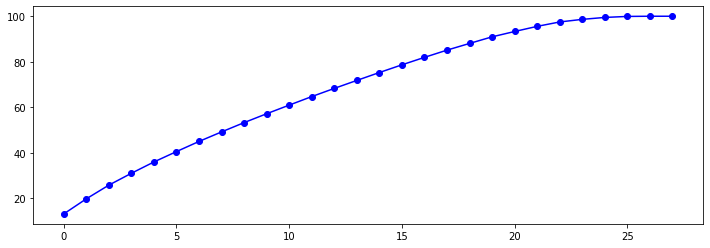

In [75]:
plt.figure(figsize=(12, 4))
plt.plot(var1, color = 'blue', marker = 'o')

### Neural Network Model

In [76]:
x = np.array(fire.iloc[:, 0:28])
y = np.array(fire.iloc[:, 28])

In [77]:
def normfunc(i):
    n = (i - i.mean()) / (i.max() - i.min())
    return (n)

In [78]:
x_norm = normfunc(x)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, stratify=y)

In [80]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [81]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
model.fit(x_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
52/52 [==============================] - 1s 3ms/step - loss: 0.6075 - accuracy: 0.6053
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3418 - accuracy: 0.7312
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: -0.0706 - accuracy: 0.7312
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: -0.5610 - accuracy: 0.7312
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: -1.0585 - accuracy: 0.7312
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: -1.6489 - accuracy: 0.7312
Epoch 7/100
52/52 [==============================] - 0s 3ms/step - loss: -2.4521 - accuracy: 0.7312
Epoch 8/100
52/52 [==============================] - 0s 3ms/step - loss: -3.5205 - accuracy: 0.7312
Epoch 9/100
52/52 [==============================] - 0s 3ms/step - loss: -4.9365 - accuracy: 0.7312
Epoch 10/100
52/52 [==============================] - 0s 3ms/step - loss: -6.7934 - accuracy: 0.7312
E

In [83]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy : ', accuracy*100)

13/13 [==============================] - 0s 3ms/step - loss: -4601.8906 - accuracy: 0.7312
Accuracy :  73.12348484992981
